## UNIT 1 LABORATORY ASSIGNEMENT

In [61]:
import numpy as np
import pandas as pd

from scipy.io import savemat
from statsmodels.stats.weightstats import ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns

**1 A team of researchers compared controls and agoraphobia patients on a reaction time task involving pictures of open spaces. Create a matrix of simulated RT data for these two groups**

MATLAB command  
data = [ones(20,1) normrnd(452,20,20,1); ones(20,1)*2 normrnd(483,18,20,1)];

In [47]:
def data_simulator(groups_parameters, n):
    """
    Simulate RT data given groups parameters
    """
    df = []
    for group_id, parameters in groups_parameters.items():
    
        group = pd.DataFrame(columns=['group', 'RT'])
        group['group'] = [group_id]*n
        group['RT'] = np.random.normal(parameters[0], parameters[1], size=(n))
        df.append(group)

    df = pd.concat(df)
    return df

This matrix includes 2 columns corresponding to group (1=controls, 2=patients) and RTs. Type data in the next line without a semicolon to show the data in the command window. Inspect this matrix of data so you understand its structure and characteristics. Note that your data will be different from that of others because of normrnd will produce different results each time.

In [48]:
df = data_simulator(groups_parameters={'1': (452, 20), '2':(483, 18)}, n=20)
df.head(10)

,group,RT
0,1,466.528312
1,1,446.096676
2,1,471.769211
3,1,472.267469
4,1,449.412329
5,1,434.016819
6,1,418.644999
7,1,471.208299
8,1,443.739930
9,1,475.211749


**2 Change the matrix so that the data are sorted according to RTs**

In [49]:
df.sort_values('RT').head(10)

,group,RT
6,1,418.644999
10,1,432.555068
5,1,434.016819
15,1,434.251047
8,1,443.739930
1,2,445.915785
1,1,446.096676
13,1,448.318623
19,1,448.562462
4,1,449.412329


**3. Create 2 new variables called ctrl and ap corresponding to the 2 groups (note that we only want the second column)**

In [50]:
ctrl = df[df['group']=='1']['RT'].values
ap = df[df['group']=='2']['RT'].values

**4. Compute the mean and standard deviation for each group and put it all in one 2 x 2 matrix called descriptives.**

In [51]:
descriptives = np.array(
    [
        [ctrl.mean(), ctrl.std()],
        [ap.mean(), ap.std()]
    ]
)
print(descriptives)

[[456.36541217  17.32058595]
 [482.12644085  21.16613452]]


**5. Statistically compare the RTs of the 2 groups and report the inferential statistics.**

In [52]:
t, p, dof = ttest_ind(ctrl, ap)
print(
    f"""
    t: {t}
    p: {p}
    dof: {dof}
    """
)


    t: -4.105696999712529
    p: 0.00020611032982181563
    dof: 38.0
    


**6. Compute the standard error of the mean for each group and put this in a new vector called sem.**  
**7. Write a function called sem which computes the standard error of the mean for a vector of data.**

In [53]:
def compute_sem(sample):
    """
    Compute standard error of the mean given sample
    """
    std = np.std(sample)
    sem = std / (len(sample)**0.5)
    return sem

sem = np.array([compute_sem(ctrl), compute_sem(ap)])
print(sem)

[3.87300076 4.73289156]


**8. Previous research suggests that RTs above 500ms in this task were clinically significant. Within MATLAB, determine how many participants in each group had RTs above this threshold and put them in a new vector called exn**

In [54]:
df[df['RT'] > 500].groupby('group').count()

,RT
group,
2,3


In [57]:
exn = df[df['RT'] > 500]['RT'].values
print(exn)

[517.113254   510.81491938 532.87595262]


**9. Create a new (3rd) column in your main file (data) that indicates whether a participant’s RT is greater than 500 or not**

In [59]:
df['clinically_sig'] = df['RT'] > 500
df.head(10)

,group,RT,clinically_sig
0,1,466.528312,False
1,1,446.096676,False
2,1,471.769211,False
3,1,472.267469,False
4,1,449.412329,False
5,1,434.016819,False
6,1,418.644999,False
7,1,471.208299,False
8,1,443.739930,False
9,1,475.211749,False


**10. Save this new variable as a .mat file called data in your current folder.**

In [64]:
savemat('data.mat', {"struct": df.to_dict("list")})

**11. Create a figure with 2 side-by-side plots depicting the distributions of the RTs in each group**

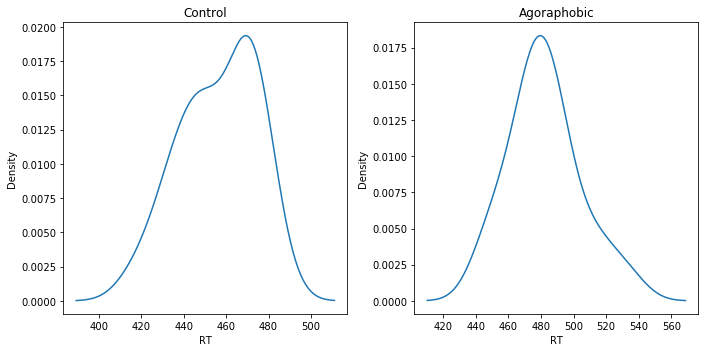

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(
    df[df['group']=='1']['RT'],
    ax=axs[0]
)
axs[0].set_title('Control')
sns.kdeplot(
    df[df['group']=='2']['RT'],
    ax=axs[1]
)
axs[1].set_title('Agoraphobic')
plt.tight_layout()
plt.show()